In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/berkatbhatti/Desktop/python/Portfolio/CNN_ConvolutionalNeuralNetworks /Cells Classification With CNN'

## import operating system

In [3]:
import os

## Setting data dir 

In [4]:
data_dir = "/Volumes/External_HD/Data/Tensor_Flow_Data/TF_2_Notebooks_and_Data/cell_images"

In [5]:
os.listdir(data_dir)

['test', 'train']

## ressding image files

In [6]:
from matplotlib.image import imread

In [7]:
test_path = data_dir+"/test"

In [8]:
test_path

'/Volumes/External_HD/Data/Tensor_Flow_Data/TF_2_Notebooks_and_Data/cell_images/test'

In [9]:
train_path = data_dir+"/train"

In [10]:
train_path

'/Volumes/External_HD/Data/Tensor_Flow_Data/TF_2_Notebooks_and_Data/cell_images/train'

In [11]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [12]:
os.listdir(train_path)

['parasitized', 'uninfected']

### theory
- In throry we could save doctors alot of time by running these images into a model to determine infections
- lets take a look at a single image

In [13]:
os.listdir(train_path+"/parasitized")[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [14]:
para_cell = train_path+"/parasitized"+"/C100P61ThinF_IMG_20150918_144104_cell_162.png"

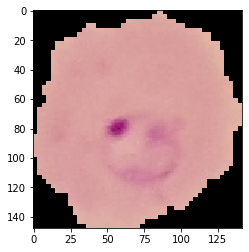

In [15]:
plt.imshow(imread(para_cell))

In [16]:
os.listdir(train_path+"/uninfected")[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [17]:
uninfected_cell = train_path+"/uninfected"+"/C100P61ThinF_IMG_20150918_144104_cell_128.png"

In [18]:
uninfected_cell

'/Volumes/External_HD/Data/Tensor_Flow_Data/TF_2_Notebooks_and_Data/cell_images/train/uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'

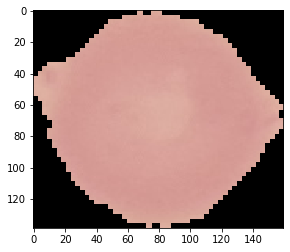

In [19]:
plt.imshow(imread(uninfected_cell))

## Checking how many images we have

In [20]:
len(os.listdir(train_path+"/parasitized"))

12480

In [21]:
len(os.listdir(train_path+"/uninfected"))

12480

In [22]:
len(os.listdir(test_path+"/parasitized"))

1300

In [23]:
len(os.listdir(test_path+"/uninfected"))

1300

## Handling different image sizes
- will for loop in to al lthe images for the training set to get the dimensitons of each

In [24]:
os.listdir(train_path+"/parasitized")

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [25]:
os.listdir(train_path+"/uninfected")

['C100P61ThinF_IMG_20150918_144104_cell_128.png',
 'C100P61ThinF_IMG_20150918_144104_cell_131.png',
 'C100P61ThinF_IMG_20150918_144104_cell_144.png',
 'C100P61ThinF_IMG_20150918_144104_cell_21.png',
 'C100P61ThinF_IMG_20150918_144104_cell_25.png',
 'C100P61ThinF_IMG_20150918_144104_cell_48.png',
 'C100P61ThinF_IMG_20150918_144104_cell_65.png',
 'C100P61ThinF_IMG_20150918_144348_cell_120.png',
 'C100P61ThinF_IMG_20150918_144348_cell_125.png',
 'C100P61ThinF_IMG_20150918_144348_cell_131.png',
 'C100P61ThinF_IMG_20150918_144348_cell_2.png',
 'C100P61ThinF_IMG_20150918_144348_cell_25.png',
 'C100P61ThinF_IMG_20150918_144348_cell_40.png',
 'C100P61ThinF_IMG_20150918_144348_cell_71.png',
 'C100P61ThinF_IMG_20150918_144823_cell_126.png',
 'C100P61ThinF_IMG_20150918_144823_cell_127.png',
 'C100P61ThinF_IMG_20150918_144823_cell_139.png',
 'C100P61ThinF_IMG_20150918_144823_cell_142.png',
 'C100P61ThinF_IMG_20150918_144823_cell_151.png',
 'C100P61ThinF_IMG_20150918_144823_cell_21.png',
 'C100P61T

In [27]:
dim1 = []
dim2 = []
for image_name in os.listdir(test_path+"/uninfected")[0:]:
    image = imread(test_path+"/uninfected/"+image_name)
    d1,d2,cshape = image.shape
    dim1.append(d1)
    dim2.append(d2)

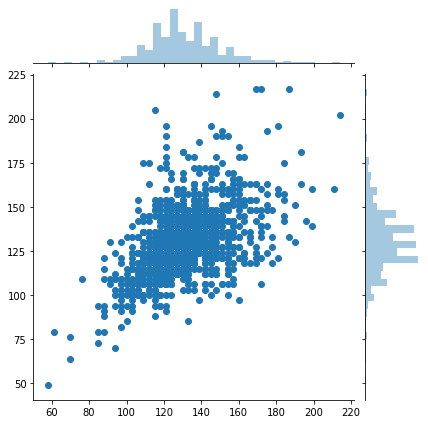

In [30]:
sns.jointplot(dim1, dim2)

### images are all of different sized so we will need to set an average width and height for the images

In [31]:
np.mean(dim1)

130.92538461538462

In [32]:
np.mean(dim2)

130.75

In [33]:
images_dim = (130,130,3)

### Data Processing
- will use keras iamge datsa generator
- we will minipulate the images
- there are two many images to pass and are too large so we will need to select batches 130X130X3
- images need to be robust enough that its not recognizable by the model. So performing things like rotations, resizing etc

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
ImageDataGenerator?

## Transformations
- Expand images (creating more without getting more blood cells from people) - rotation 
- Will take our current images and randomly rotate them (degrees 20)
- width shift range -> shift the image with by a max percentage(0.1, 0 to 10% to shift width)- Depends on the shape since we are using blobs,facial images will be bad becaue its not useful to a camera to see upsidedown images
- rescale - 1/255 is the images sixez are not scaled (normally)
- shear range -> chops parts of the image = 0.1
- zoom range - 0.1
- horzontal flip =. True
- Fill mode = "nearest" - transformatin, stretch how will we fill -> nearest pixel value



In [36]:
img_gen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1, 
                             height_shift_range=-.1,
                            shear_range= 0.1, zoom_range=0.1, horizontal_flip=True, fill_mode="nearest")

In [42]:
para_image = imread(para_cell)

### Testing image generator on uninfeced cell 

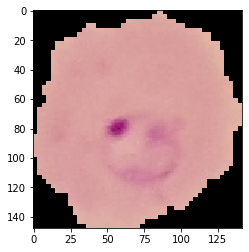

In [44]:
plt.imshow(para_image)

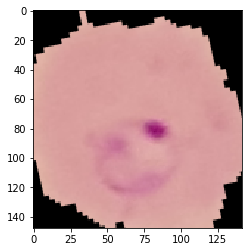

In [54]:
plt.imshow(img_gen.random_transform(para_image))

### setting up directories to flow batches from a directory

In [55]:
img_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [56]:
img_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


## creating the model

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten

In [59]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (2,2), strides = (1,1),
                padding= "valid", input_shape = images_dim, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (2,2), strides = (1,1),
                padding= "valid", input_shape = images_dim, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (2,2), strides = (1,1),
                padding= "valid", input_shape = images_dim, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

## early stopping 

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=5)

In [62]:
images_dim

(130, 130, 3)

In [63]:
train_image_gen = img_gen.flow_from_directory?

In [64]:
batch_size = 16

In [65]:
train_image_gen = img_gen.flow_from_directory(train_path, target_size=(130,130),
                                              batch_size=batch_size, class_mode="binary" )

Found 24958 images belonging to 2 classes.


In [66]:
test_image_gen = img_gen.flow_from_directory(test_path, target_size=(130,130),batch_size=batch_size,
                                              class_mode="binary", shuffle=False)

Found 2600 images belonging to 2 classes.


In [67]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [68]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}